<a href="https://colab.research.google.com/github/abbasly/Detecting-and-Analyzing-Suicidal-Posts/blob/master/suicidal_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import seaborn as sns
from nltk.tokenize import word_tokenize

from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_colwidth', None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
def get_terms_list(path):
    # Convert term list in the file to python list
    terms = []
    with open(path,'r') as f:
        Lines = f.readlines()

        for line in Lines:
            terms.append(line.replace("\n",""))
        
        f.close()
    return terms

In [ ]:
df = pd.read_csv("/content/suicide_dataset.csv", encoding = "ISO-8859-1")
df = df.reset_index()
df = df[:599]
df_sub = df[:400]
df_sub = df_sub.drop(df_sub[df_sub.other == 1].index)
df = pd.concat([df_sub,df[401:599]])
print(" SHAPEEEEE ",df.shape)
pos_terms_count = []
neg_term_count = []

# For Sentiment Analysis
pos_score = []
neg_score = []
neu_score = []
sia = SentimentIntensityAnalyzer()
print(sia.polarity_scores(""" gIt feels feels like people only care when I'm on the ledge
No matter what I do it seems like people only care while I'm trying, no one cares amount before and even less do after."""))
for index, row in df.iterrows():
  sentiment = sia.polarity_scores(row['text'])
  pos_score.append(sentiment['pos'])
  neg_score.append(sentiment['neg'])
  neu_score.append(sentiment['neu'])
  #s = sum(i in word_tokenize(row['text']) for i in get_terms_list('/content/positive_terms.txt'))
  #print(s)
  #pos_terms_count.append(s)
print(pos_terms_count)

"""for index, row in df.iterrows():
  neg_term_count.append(sum(i in word_tokenize(row['text']) for i in get_terms_list('/content/negative_terms.txt')))
print(neg_term_count)"""

#df['pos_terms'] = pos_terms_count
#df['neg_terms'] = neg_term_count
#df['pos_terms'] = [0, 1, 1, 1, 2, 6, 3, 0, 2, 23, 0, 0, 0, 0, 1, 7, 4, 3, 1, 12, 1, 0, 5, 3, 6, 12, 2, 3, 5, 0, 1, 0, 3, 0, 0, 2, 4, 2, 0, 3, 0, 37, 3, 2, 1, 1, 7, 0, 6, 0, 2, 1, 8, 1, 6, 0, 0, 4, 1, 1, 1, 4, 5, 1, 1, 2, 4, 1, 4, 16, 1, 5, 3, 25, 2, 1, 3, 0, 7, 5, 4, 20, 12, 0, 2, 5, 1, 0, 3, 1, 1, 1, 0, 2, 6, 2, 9, 4, 9, 1, 1, 0, 29, 2, 2, 3, 0, 1, 7, 0, 3, 2, 0, 2, 4, 0, 6, 5, 1, 0, 0, 0, 5, 2, 0, 6, 0, 3, 0, 1, 2, 1, 2, 5, 5, 8, 1, 0, 0, 2, 1, 0, 0, 4, 4, 0, 1, 1, 4, 4, 9, 0, 2, 7, 3, 5, 1, 3, 19, 7, 4, 22, 0, 13, 0, 2, 5, 1, 2, 0, 0, 1, 0, 4, 2, 0, 2, 7, 15, 1, 6, 1, 2, 3, 4, 9, 3, 5, 2, 7, 2, 1, 0, 0, 0, 3, 5, 3, 10, 9, 2, 1, 1, 0, 9, 1, 1, 0, 3, 5, 5, 0, 28, 1, 1, 0, 10, 1, 2, 7, 3, 6, 0, 4, 1, 0, 1, 7, 5, 0, 1, 3, 13, 2, 0, 1, 11, 11, 0, 2, 1, 1, 6, 0, 0, 2, 2, 2, 6, 3, 4, 6, 1, 0, 0, 11, 0, 0, 1, 1, 0, 1, 1, 3, 0, 2, 0, 0, 0, 0, 12, 6, 1, 4, 0, 2, 10, 0, 16, 2, 1, 1, 0, 0, 5, 2, 1, 1, 1, 14, 3, 2, 3, 0, 1, 1, 1, 0, 1, 2, 1, 22, 4, 0, 13, 0, 9, 1, 1, 2, 2, 3, 6, 0, 1, 0, 1, 2, 0, 6, 2, 3, 1, 2, 0, 7, 2, 1, 3, 2, 0, 1, 0, 1, 0, 10, 0, 1, 15, 2, 2, 8, 2, 0, 1, 2, 3, 4, 2, 3, 13, 0, 2, 2, 1, 0, 3, 2, 1, 1, 1, 1, 7, 1, 0, 1, 0, 5, 0, 0, 1, 5, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0, 0, 3, 3, 4, 2, 9, 0, 0, 0, 9, 0, 2, 6, 0, 22, 5, 3, 1]
#df['neg_terms'] = [0, 2, 1, 0, 1, 5, 7, 0, 0, 42, 0, 0, 1, 0, 0, 19, 1, 5, 2, 12, 5, 1, 12, 5, 13, 9, 4, 7, 6, 0, 0, 1, 2, 0, 1, 0, 12, 4, 2, 1, 1, 59, 15, 6, 1, 2, 10, 0, 18, 2, 2, 1, 8, 4, 7, 1, 1, 6, 2, 1, 1, 0, 10, 1, 4, 8, 7, 0, 5, 21, 1, 3, 0, 28, 2, 0, 6, 1, 6, 7, 1, 38, 30, 6, 1, 3, 1, 1, 4, 0, 0, 0, 1, 1, 10, 1, 14, 15, 12, 4, 0, 0, 32, 4, 2, 1, 0, 8, 6, 0, 3, 4, 4, 12, 10, 0, 9, 6, 8, 0, 5, 1, 11, 8, 1, 4, 3, 3, 2, 5, 4, 1, 1, 9, 3, 4, 0, 2, 0, 1, 1, 2, 2, 2, 11, 1, 1, 4, 13, 9, 23, 1, 9, 9, 6, 8, 0, 6, 66, 16, 14, 21, 1, 23, 2, 0, 5, 2, 1, 1, 2, 1, 3, 2, 4, 1, 3, 14, 34, 6, 11, 6, 4, 8, 3, 10, 2, 9, 14, 19, 2, 0, 2, 1, 1, 17, 7, 7, 25, 15, 3, 6, 2, 0, 4, 0, 10, 3, 4, 9, 7, 0, 45, 1, 8, 0, 26, 2, 6, 17, 6, 4, 2, 1, 2, 1, 7, 15, 9, 0, 7, 8, 8, 11, 4, 0, 24, 7, 1, 4, 1, 2, 7, 1, 2, 7, 2, 0, 10, 8, 1, 2, 0, 1, 1, 27, 1, 1, 0, 3, 0, 5, 8, 2, 1, 0, 1, 1, 0, 1, 17, 9, 4, 2, 5, 3, 14, 0, 20, 3, 1, 1, 0, 0, 6, 3, 2, 0, 5, 18, 12, 4, 2, 0, 0, 3, 0, 1, 0, 11, 1, 33, 6, 1, 13, 1, 11, 0, 2, 9, 0, 6, 10, 0, 1, 0, 1, 11, 1, 4, 1, 0, 5, 1, 1, 8, 4, 7, 5, 0, 3, 3, 3, 3, 2, 7, 0, 0, 16, 3, 7, 13, 1, 2, 6, 2, 2, 6, 7, 8, 13, 0, 7, 9, 2, 3, 0, 5, 5, 2, 1, 1, 4, 1, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 4, 0, 0, 5, 0, 5, 6, 1, 1, 6, 1, 8, 0, 22, 1, 2, 2, 13, 2, 2, 5, 0, 47, 10, 0, 2]
#df['pos_score'] = pos_score
#df['neg_score'] = neg_score
#df['neu_score'] = neu_score
print(df[:15])
# Using 'Address' as the column name
# and equating it to the list
df_labels = df.drop(['id', 'text','class','index'], axis=1)
counts = []
categories = list(df_labels.columns.values)
for i in categories:
    counts.append((i, df_labels[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
print(df_stats)

 SHAPEEEEE  (516, 15)
{'neg': 0.094, 'neu': 0.576, 'pos': 0.33, 'compound': 0.8779}
[]
    index  id  \
0       0   0   
2       2   2   
3       3   3   
4       4   4   
5       5   5   
6       6   6   
7       7   7   
8       8   8   
9       9   9   
10     10  10   
11     11  11   
12     12  12   
13     13  13   
14     14  14   
15     15  15   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, '# of categories')

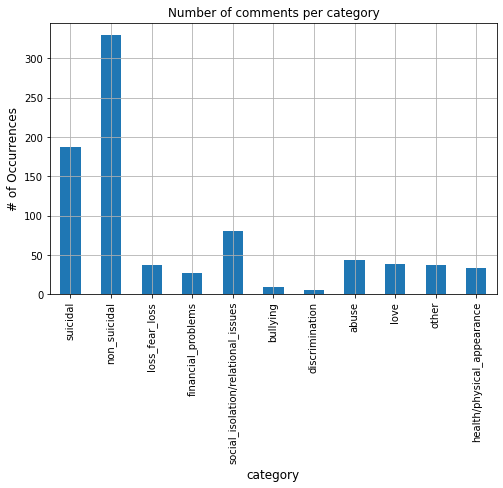

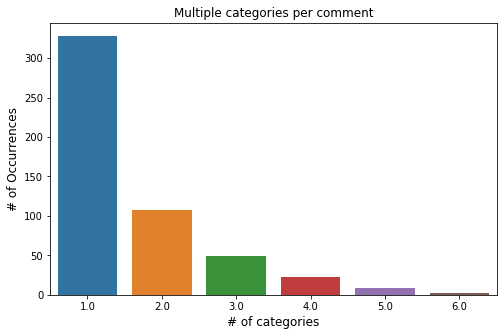

In [ ]:
df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of comments per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)
#plt.show()
rowsums = df.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()
#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple categories per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)
#plt.show()

In [ ]:
categories = ['suicidal','non_suicidal','loss_fear_loss','financial_problems','social_isolation/relational_issues','bullying','discrimination','abuse','love','other','health/physical_appearance']
""",'loss_fear_loss','financial_problems','social_isolation/relational_issues','bullying','discrimination','abuse','breakup_fear_breakup','other','health/physical_appearance'"""
train, test = train_test_split(df, random_state=42, test_size=0.1, shuffle=True)

For Anar: the next block is a lengthy attempt to work on your part. I defined a list of words, bigrams, trigrams that belong to a category and for each post, i counted how many words from a list were in the post.
The list of words is made like this: 
for each post, i look into every other post
if there is a word in common and the posts share the same category, i sum up the score of the word for that category.
Otherwise, if the posts share the same words but not the same category, i reduce the score of the word by one.
This way, i try to give a weight to words. Words that more often belong to a certain category and not to other categories, should have higher score
The accuracy is very bad, as you can see below.
Basically it predicts suicidal and non-suicidal pretty well
but has 0% accuracy on almost every other label

I can lastly try tomorrow night to add more posts. This is the last thing i can do because
I hope you can try to find a 

In [ ]:
loss_fear_loss_weighted_terms={}
financial_problems_weighted_terms={}
relational_weighted_terms={}
bullying_weighted_terms={}
discrimination_weighted_terms={}
abuse_weighted_terms={}
love_weighted_terms={}
other_weighted_terms={}
health_weighted_terms={}
for index, row in train.iterrows():
  loss_fear_loss={}
  financial_problems={}
  relational={}
  bullying={}
  discrimination={}
  abuse={}
  love={}
  other={}
  health={}
  tokenized_text = word_tokenize(row['text'])

  bi_grams = nltk.ngrams(tokenized_text, 2)
  bigrams_list = [b[0] + " "+ b[1] for b in bi_grams]
  tri_grams = nltk.ngrams(row['text'], 3)
  trigrams_list = [t[0] + " "+ t[1] + " " + t[2] for t in tri_grams]
  categories_1 = []
  if(row['loss_fear_loss'] == 1):
    categories_1.append('loss_fear_loss')
  if(row['financial_problems'] == 1):
    categories_1.append('financial_problems')
  if(row['social_isolation/relational_issues'] == 1):
    categories_1.append('social_isolation/relational_issues')
  if(row['discrimination'] == 1):
    categories_1.append('discrimination')
  if(row['abuse'] == 1):
    categories_1.append('abuse')
  if(row['love'] == 1):
    categories_1.append('love')
  if(row['other'] == 1):
    categories_1.append('other')
  if(row['health/physical_appearance'] == 1):
    categories_1.append('health/physical_appearance')
  if(row['bullying'] == 1):
    categories_1.append('bullying')
  #print(" CAT 1 ",categories_1)
  # I assign the words to each category dictionary associated with the text
  for w in tokenized_text:
      if('loss_fear_loss' in categories_1):
        try:
          loss_fear_loss[w] += 1
        except:
          loss_fear_loss[w] = 1
      if('financial_problems' in categories_1):
        try:
          financial_problems[w]+=1
        except:
          financial_problems[w]=1
      if('social_isolation/relational_issues' in categories_1):
        try:
          relational[w]+=1
        except:
          relational[w]=1
      if('discrimination' in categories_1):
        try:
          discrimination[w]+=1
        except:
          discrimination[w]=1
      if('abuse' in categories_1):
        try:
          abuse[w]+=1
        except:
          abuse[w]=1
      if('love' in categories_1):
        try:
          love[w]+=1
        except:
          love[w]=1
      if('other' in categories_1):
        try:
          other[w]+=1
        except:
          other[w]=1
      if('health/physical_appearance' in categories_1):
        try:
          health[w]+=1
        except:
          health[w]=1
      if('bullying' in categories_1):
        try:
          bullying[w]+=1
        except:
          bullying[w]=1
  for b in bigrams_list:
      if('loss_fear_loss' in categories_1):
        try:
          loss_fear_loss[b] += 1
        except:
          loss_fear_loss[b] = 1
      if('financial_problems' in categories_1):
        try:
          financial_problems[b]+=1
        except:
          financial_problems[b]=1
      if('social_isolation/relational_issues' in categories_1):
        try:
          relational[b]+=1
        except:
          relational[b]=1
      if('discrimination' in categories_1):
        try:
          discrimination[b]+=1
        except:
          discrimination[b]=1
      if('abuse' in categories_1):
        try:
          abuse[b]+=1
        except:
          abuse[b]=1
      if('love' in categories_1):
        try:
          love[b]+=1
        except:
          love[b]=1
      if('other' in categories_1):
        try:
          other[b]+=1
        except:
          other[b]=1
      if('health/physical_appearance' in categories_1):
        try:
          health[b]+=1
        except:
          health[b]=1
      if('bullying' in categories_1):
        try:
          bullying[b]+=1
        except:
          bullying[b]=1
  for t in trigrams_list:
      if('loss_fear_loss' in categories_1):
        try:
          loss_fear_loss[t] += 1
        except:
          loss_fear_loss[t] = 1
      if('financial_problems' in categories_1):
        try:
          financial_problems[t]+=1
        except:
          financial_problems[t]=1
      if('social_isolation/relational_issues' in categories_1):
        try:
          relational[t]+=1
        except:
          relational[t]=1
      if('discrimination' in categories_1):
        try:
          discrimination[t]+=1
        except:
          discrimination[t]=1
      if('abuse' in categories_1):
        try:
          abuse[t]+=1
        except:
          abuse[t]=1
      if('love' in categories_1):
        try:
          love[t]+=1
        except:
          love[t]=1
      if('other' in categories_1):
        try:
          other[t]+=1
        except:
          other[t]=1
      if('health/physical_appearance' in categories_1):
        try:
          health[t]+=1
        except:
          health[t]=1
      if('bullying' in categories_1):
        try:
          bullying[t]+=1
        except:
          bullying[t]=1
  for i, r in train.iterrows():
    if(i!=index):
      tokenized_text2 = word_tokenize(r['text'])
      bi_grams2 = nltk.ngrams(tokenized_text2, 2)
      bigrams_list2 = [b[0] + " "+ b[1] for b in bi_grams2]
      tri_grams2 = nltk.ngrams(r['text'], 3)
      trigrams_list = [t[0] + " "+ t[1] + " " + t[2] for t in tri_grams2]
      categories_2 = []
      if(r['loss_fear_loss'] == 1):
        categories_2.append('loss_fear_loss')
      if(r['financial_problems'] == 1):
        categories_2.append('financial_problems')
      if(r['social_isolation/relational_issues'] == 1):
        categories_2.append('social_isolation/relational_issues')
      if(r['discrimination'] == 1):
        categories_2.append('discrimination')
      if(r['abuse'] == 1):
        categories_2.append('abuse')
      if(r['love'] == 1):
        categories_2.append('love')
      if(r['other'] == 1):
        categories_2.append('other')
      if(r['health/physical_appearance'] == 1):
        categories_2.append('health/physical_appearance')
      if(r['bullying'] == 1):
        categories_2.append('bullying')
      #print(" CAT 2 ",categories_2)
      for w in tokenized_text:
        for wr in tokenized_text2:
          if(w==wr):
            if('loss_fear_loss' in categories_1 and 'loss_fear_loss' in categories_2):
              loss_fear_loss[w]+=1
            if('financial_problems' in categories_1 and 'financial_problems' in categories_2):
              financial_problems[w]+=1
              if(w == 'savings'):
                print(w, " ", financial_problems[w], " ",r['text']," ",i, " index ",index)
            if('social_isolation/relational_issues' in categories_1 and 'social_isolation/relational_issues' in categories_2):
              relational[w]+=1
            if('discrimination' in categories_1 and 'discrimination' in categories_2):
              discrimination[w]+=1
            if('abuse' in categories_1 and 'abuse' in categories_2):
              abuse[w]+=1
            if('love' in categories_1 and 'love' in categories_2):
              love[w]+=1
            if('other' in categories_1 and 'other' in categories_2):
              other[w]+=1
            if('health/physical_appearance' in categories_1 and 'health/physical_appearance' in categories_2):
              health[w]+=1
            if('bullying' in categories_1 and 'bullying' in categories_2):
              bullying[w]+=1

            if('loss_fear_loss' in categories_1 and 'loss_fear_loss' not in categories_2):
              loss_fear_loss[w]-=1
            if('financial_problems' in categories_1 and 'financial_problems' not in categories_2):
              financial_problems[w]-=1
              if(w == 'savings'):
                print(w, " ", financial_problems[w], " ",r['text']," ",i, " index ",index)
            if('social_isolation/relational_issues' in categories_1 and 'social_isolation/relational_issues' not in categories_2):
              relational[w]-=1
            if('discrimination' in categories_1 and 'discrimination' not in categories_2):
              discrimination[w]-=1
            if('abuse' in categories_1 and 'abuse' not in categories_2):
              abuse[w]-=1
            if('love' in categories_1 and 'love' not in categories_2):
              love[w]-=1
            if('other' in categories_1 and 'other' not in categories_2):
              other[w]-=1
            if('health/physical_appearance' in categories_1 and 'health/physical_appearance' not in categories_2):
              health[w]-=1
            if('bullying' in categories_1 and 'bullying' not in categories_2):
              bullying[w]-=1
      for b in bi_grams:
        for br in bi_grams2:
          if(b==br):
            if('loss_fear_loss' in categories_1 and 'loss_fear_loss' in categories_2):
              loss_fear_loss[b]+=1
            if('financial_problems' in categories_1 and 'financial_problems' in categories_2):
              financial_problems[b]+=1
            if('social_isolation/relational_issues' in categories_1 and 'social_isolation/relational_issues' in categories_2):
              relational[b]+=1
            if('discrimination' in categories_1 and 'discrimination' in categories_2):
              discrimination[b]+=1
            if('abuse' in categories_1 and 'abuse' in categories_2):
              abuse[b]+=1
            if('love' in categories_1 and 'love' in categories_2):
              love[b]+=1
            if('other' in categories_1 and 'other' in categories_2):
              other[b]+=1
            if('health/physical_appearance' in categories_1 and 'health/physical_appearance' in categories_2):
              health[b]+=1
            if('bullying' in categories_1 and 'bullying' in categories_2):
              bullying[b]+=1

            if('loss_fear_loss' in categories_1 and 'loss_fear_loss' not in categories_2):
              loss_fear_loss[b]-=1
            if('financial_problems' in categories_1 and 'financial_problems' not in categories_2):
              financial_problems[b]-=1
            if('social_isolation/relational_issues' in categories_1 and 'social_isolation/relational_issues' not in categories_2):
              relational[b]-=1
            if('discrimination' in categories_1 and 'discrimination' not in categories_2):
              discrimination[b]-=1
            if('abuse' in categories_1 and 'abuse' not in categories_2):
              abuse[b]-=1
            if('love' in categories_1 and 'love' not in categories_2):
              love[b]-=1
            if('other' in categories_1 and 'other' not in categories_2):
              other[b]-=1
            if('health/physical_appearance' in categories_1 and 'health/physical_appearance' not in categories_2):
              health[b]-=1
            if('bullying' in categories_1 and 'bullying' not in categories_2):
              bullying[b]-=1
      for t in tri_grams:
        for tr in tri_grams2:
          if(t==tr):
            if('loss_fear_loss' in categories_1 and 'loss_fear_loss' in categories_2):
              loss_fear_loss[t]+=1
            if('financial_problems' in categories_1 and 'financial_problems' in categories_2):
              financial_problems[t]+=1
            if('social_isolation/relational_issues' in categories_1 and 'social_isolation/relational_issues' in categories_2):
              relational[t]+=1
            if('discrimination' in categories_1 and 'discrimination' in categories_2):
              discrimination[t]+=1
            if('abuse' in categories_1 and 'abuse' in categories_2):
              abuse[t]+=1
            if('love' in categories_1 and 'love' in categories_2):
              love[t]+=1
            if('other' in categories_1 and 'other' in categories_2):
              other[t]+=1
            if('health/physical_appearance' in categories_1 and 'health/physical_appearance' in categories_2):
              health[t]+=1
            if('bullying' in categories_1 and 'bullying' in categories_2):
              bullying[t]+=1

            if('loss_fear_loss' in categories_1 and 'loss_fear_loss' not in categories_2):
              loss_fear_loss[t]-=1
            if('financial_problems' in categories_1 and 'financial_problems' not in categories_2):
              financial_problems[t]-=1
            if('social_isolation/relational_issues' in categories_1 and 'social_isolation/relational_issues' not in categories_2):
              relational[t]-=1
            if('discrimination' in categories_1 and 'discrimination' not in categories_2):
              discrimination[t]-=1
            if('abuse' in categories_1 and 'abuse' not in categories_2):
              abuse[t]-=1
            if('love' in categories_1 and 'love' not in categories_2):
              love[t]-=1
            if('other' in categories_1 and 'other' not in categories_2):
              other[t]-=1
            if('health/physical_appearance' in categories_1 and 'health/physical_appearance' not in categories_2):
              health[t]-=1
            if('bullying' in categories_1 and 'bullying' not in categories_2):
              bullying[t]-=1
  if('loss_fear_loss' in categories_1):
    for key, value in loss_fear_loss.items():
      if(key not in loss_fear_loss_weighted_terms):
        loss_fear_loss_weighted_terms[key] = value
  if('financial_problems' in categories_1):
    for key, value in financial_problems.items():
      if(key not in financial_problems_weighted_terms):
        financial_problems_weighted_terms[key] = value
        #print(" STAMPO FINANCIAL PROBLEMS ", financial_problems_weighted_terms)
  if('social_isolation/relational_issues' in categories_1):
    for key, value in relational.items():
      if(key not in relational_weighted_terms):
        relational_weighted_terms[key] = value
  if('discrimination' in categories_1):
    for key, value in bullying.items():
      if(key not in bullying_weighted_terms):
        bullying_weighted_terms[key] = value
  if('abuse' in categories_1):
    for key, value in discrimination.items():
      if(key not in discrimination_weighted_terms):
        discrimination_weighted_terms[key] = value
  if('love' in categories_1):
    for key, value in abuse.items():
      if(key not in abuse_weighted_terms):
        abuse_weighted_terms[key] = value
  if('other' in categories_1):
    for key, value in love.items():
      if(key not in love_weighted_terms):
        love_weighted_terms[key] = value
  if('health/physical_appearance' in categories_1):
    for key, value in other.items():
      if(key not in other_weighted_terms):
        other_weighted_terms[key] = value
  if('bullying' in categories_1):
    for key, value in health.items():
      if(key not in health_weighted_terms):
        health_weighted_terms[key] = value
print(financial_problems_weighted_terms)
financial_problems_weighted_terms = {key:val for key, val in financial_problems_weighted_terms.items() if val >= 0}
loss_fear_loss_weighted_terms = {key:val for key, val in loss_fear_loss_weighted_terms.items() if val >= 0}
relational_weighted_terms = {key:val for key, val in relational_weighted_terms.items() if val >= 0}
bullying_weighted_terms = {key:val for key, val in bullying_weighted_terms.items() if val >= 0}
discrimination_weighted_terms = {key:val for key, val in discrimination_weighted_terms.items() if val >= 0}
abuse_weighted_terms = {key:val for key, val in abuse_weighted_terms.items() if val >= 0}
love_weighted_terms = {key:val for key, val in love_weighted_terms.items() if val >= 0}
other_weighted_terms = {key:val for key, val in other_weighted_terms.items() if val >= 0}
health_weighted_terms = {key:val for key, val in health_weighted_terms.items() if val >= 0}


savings   2   feel like going kill student loans tl  dr  probably going kill self student loans point  went school get good job would stress money  parents gave really poor guidance even though told want go law school basically forced   student debt make  work big tech company also stocks bonus  honestly even saving future money savings sell shit end sight  think loans probably prevent marrying current bf absolute love life  truly considering killing point  basically living poverty end sight hate job quit afford loans  feel like never able house child get married  even push forward anything need  life joyless debt  suicide seems like answer  need relief  need badly    185  index  48
savings   3   guilt losing close  usd gambling savings gone  far behind life worth absolutely zero  know want recover  want end  money freedom  happiness  opportunity  trapped suffocating  gambled away life  literally  earlier year quit job profited several hundred thousand dollars investmentsmargin trading

In [ ]:

train['financial_problems_weighted_terms']=0
train['loss_fear_loss_weighted_terms']=0
train['relational_weighted_terms']=0
train['bullying_weighted_terms']=0
train['discrimination_weighted_terms']=0
train['abuse_weighted_terms']=0
train['love_weighted_terms']=0
train['other_weighted_terms']=0
train['health_weighted_terms']=0

test['financial_problems_weighted_terms']=0
test['loss_fear_loss_weighted_terms']=0
test['relational_weighted_terms']=0
test['bullying_weighted_terms']=0
test['discrimination_weighted_terms']=0
test['abuse_weighted_terms']=0
test['love_weighted_terms']=0
test['other_weighted_terms']=0
test['health_weighted_terms']=0
for index, row in train.iterrows():
  tokenized_text = word_tokenize(row['text'])
  for w in tokenized_text:
    if(w in financial_problems_weighted_terms):
      row['financial_problems_weighted_terms'] +=financial_problems_weighted_terms[w]
      train.at[index,'financial_problems_weighted_terms'] +=financial_problems_weighted_terms[w]
    if(w in loss_fear_loss_weighted_terms):
      train.loc[index,'loss_fear_loss_weighted_terms']+=loss_fear_loss_weighted_terms[w]
    if(w in relational_weighted_terms):
      train.loc[index,'relational_weighted_terms']+=relational_weighted_terms[w]
    if(w in bullying_weighted_terms):
      train.loc[index,'bullying_weighted_terms']+=bullying_weighted_terms[w]
    if(w in discrimination_weighted_terms):
      train.loc[index,'discrimination_weighted_terms']+=discrimination_weighted_terms[w]
    if(w in abuse_weighted_terms):
      train.loc[index,'abuse_weighted_terms']+=abuse_weighted_terms[w]
    if(w in love_weighted_terms):
      train.loc[index,'love_weighted_terms']+=love_weighted_terms[w]
    if(w in other_weighted_terms):
      train.loc[index,'other_weighted_terms']+=other_weighted_terms[w]
    if(w in health_weighted_terms):
      train.loc[index,'health_weighted_terms']+=health_weighted_terms[w]
for index, row in test.iterrows():
  tokenized_text = word_tokenize(row['text'])
  for w in tokenized_text:
    if(w in financial_problems_weighted_terms):
      test.loc[index,'financial_problems_weighted_terms']+=financial_problems_weighted_terms[w]
    if(w in loss_fear_loss_weighted_terms):
      test.loc[index,'loss_fear_loss_weighted_terms']+=loss_fear_loss_weighted_terms[w]
    if(w in relational_weighted_terms):
      test.loc[index,'relational_weighted_terms']+=relational_weighted_terms[w]
    if(w in bullying_weighted_terms):
      test.loc[index,'bullying_weighted_terms']+=bullying_weighted_terms[w]
    if(w in discrimination_weighted_terms):
      test.loc[index,'discrimination_weighted_terms']+=discrimination_weighted_terms[w]
    if(w in abuse_weighted_terms):
      test.loc[index,'abuse_weighted_terms']+=abuse_weighted_terms[w]
    if(w in love_weighted_terms):
      test.loc[index,'love_weighted_terms']+=love_weighted_terms[w]
    if(w in other_weighted_terms):
      test.loc[index,'other_weighted_terms']+=other_weighted_terms[w]
    if(w in health_weighted_terms):
      test.loc[index,'health_weighted_terms']+=health_weighted_terms[w]

In [ ]:
print(train[:10])
print(financial_problems_weighted_terms)
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l1', encoding='latin-1', ngram_range=(1, 4), stop_words='english', analyzer='word')

x1 = tfidf_vectorizer.fit_transform(train['text']).todense()

df1 = pd.DataFrame(x1, columns=tfidf_vectorizer.get_feature_names())

x2 = tfidf_vectorizer.transform(test['text']).todense()
df2 = pd.DataFrame(x2, columns=tfidf_vectorizer.get_feature_names())
train.drop(['text','class','id','index'], axis=1, inplace=True)
df1.reset_index(drop=True, inplace=True)
train.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
X_train = pd.concat([train, df1], axis=1)

test.drop(['text','class','id','index'], axis=1, inplace=True)

print(df2.shape)
X_test = pd.concat([test, df2], axis=1)

X_train.drop(categories, axis=1, inplace=True)
X_test.drop(categories, axis=1, inplace=True)

     index   id  \
569    569  569   
77      77   77   
586    586  586   
84      84   84   
3        3    3   
362    362  362   
424    424  424   
168    168  168   
310    310  310   
245    245  245   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          text  \
569                                                                                                 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
            ('clf', OneVsRestClassifier(MultinomialNB(
                fit_prior=True, class_prior=None))),
        ])


# train the model using X_dtm & y
print(np.any(np.isnan(train[categories])))
print(np.all(np.isfinite(train[categories])))
NB_pipeline.fit(X_train, train[categories])
# compute the testing accuracy
prediction = NB_pipeline.predict(X_test)
print(np.any(np.isnan(test[categories])))
print(np.all(np.isfinite(test[categories])))
print('Test accuracy is {}'.format(accuracy_score(test[categories], prediction)))
print('F1:', f1_score(test[categories], prediction, average='weighted'))
print(classification_report(test[categories], prediction,target_names=categories))

False
True
False
True
Test accuracy is 0.3076923076923077
F1: 0.48305314537739225
                                    precision    recall  f1-score   support

                          suicidal       0.42      0.73      0.54        15
                      non_suicidal       0.85      0.59      0.70        37
                    loss_fear_loss       0.08      1.00      0.14         1
                financial_problems       0.25      0.50      0.33         2
social_isolation/relational_issues       0.17      0.40      0.24         5
                          bullying       0.00      0.00      0.00         0
                    discrimination       0.00      0.00      0.00         0
                             abuse       0.07      0.33      0.12         3
                              love       0.00      0.00      0.00         5
                             other       0.00      0.00      0.00         2
        health/physical_appearance       0.00      0.00      0.00         5

    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
SVC_pipeline = Pipeline([
            ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
        ])

# train the model using X_dtm & y
SVC_pipeline.fit(X_train, train[categories])
# compute the testing accuracy
prediction = SVC_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(test[categories], prediction)))
print('F1:', f1_score(test[categories], prediction, average='weighted'))
print(classification_report(test[categories], prediction,target_names=categories))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Test accuracy is 0.5769230769230769
F1: 0.54
                                    precision    recall  f1-score   support

                          suicidal       0.60      0.60      0.60        15
                      non_suicidal       0.84      0.84      0.84        37
                    loss_fear_loss       0.33      1.00      0.50         1
                financial_problems       0.00      0.00      0.00         2
social_isolation/relational_issues       0.00      0.00      0.00         5
                          bullying       0.00      0.00      0.00         0
                    discrimination       0.00      0.00      0.00         0
                             abuse       0.00      0.00      0.00         3
                              love       0.00      0.00      0.00         5
                             other       0.00      0.00      0.00         2
        health/physical_appearance       0.00      0.00      0.00         5

                         micro avg       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
LogReg_pipeline = Pipeline([
            ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear',penalty='l2'), n_jobs=1)),
        ])

# train the model using X_dtm & y
LogReg_pipeline.fit(X_train, train[categories])
# compute the testing accuracy
prediction = LogReg_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(test[categories], prediction)))
print('F1:', f1_score(test[categories], prediction, average='weighted'))
print(classification_report(test[categories], prediction,target_names=categories))

Test accuracy is 0.5769230769230769
F1: 0.5133333333333333
                                    precision    recall  f1-score   support

                          suicidal       0.53      0.53      0.53        15
                      non_suicidal       0.81      0.81      0.81        37
                    loss_fear_loss       0.33      1.00      0.50         1
                financial_problems       0.00      0.00      0.00         2
social_isolation/relational_issues       0.00      0.00      0.00         5
                          bullying       0.00      0.00      0.00         0
                    discrimination       0.00      0.00      0.00         0
                             abuse       0.00      0.00      0.00         3
                              love       0.00      0.00      0.00         5
                             other       0.00      0.00      0.00         2
        health/physical_appearance       0.00      0.00      0.00         5

                         mi

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
RandomForest_pipeline = OneVsRestClassifier(make_pipeline(RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)))


# train the model using X_dtm & y
RandomForest_pipeline.fit(X_train, train[categories])
# compute the testing accuracy
prediction = RandomForest_pipeline.predict(X_test)


print('Test accuracy is {}'.format(accuracy_score(test[categories], prediction)))
print('F1:', f1_score(test[categories], prediction, average='weighted',zero_division=0))
print(classification_report(test[categories], prediction,target_names=categories))

Test accuracy is 0.6730769230769231
F1: 0.5811965811965812
                                    precision    recall  f1-score   support

                          suicidal       0.82      0.60      0.69        15
                      non_suicidal       0.85      0.95      0.90        37
                    loss_fear_loss       0.00      0.00      0.00         1
                financial_problems       0.00      0.00      0.00         2
social_isolation/relational_issues       0.00      0.00      0.00         5
                          bullying       0.00      0.00      0.00         0
                    discrimination       0.00      0.00      0.00         0
                             abuse       0.00      0.00      0.00         3
                              love       0.00      0.00      0.00         5
                             other       0.00      0.00      0.00         2
        health/physical_appearance       0.00      0.00      0.00         5

                         mi

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
